<a href="https://colab.research.google.com/github/Pakas0/2025_Computer-Vision_TI-2C/blob/main/Jobsheet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02: Klasifikasi Gambar

## Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


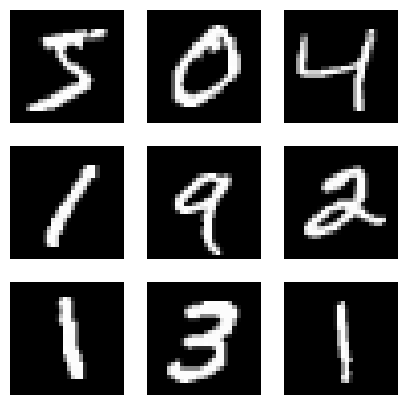

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

## Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_train = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_train_flat)

print("Akurasi:", accuracy_score(y_train, y_pred))

Akurasi: 0.9119


## Praktikum D3: Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8936 - loss: 0.3587 - val_accuracy: 0.9793 - val_loss: 0.0733
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9824 - loss: 0.0600 - val_accuracy: 0.9815 - val_loss: 0.0619
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9853 - val_loss: 0.0501
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9882 - val_loss: 0.0502
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9862 - val_loss: 0.0518


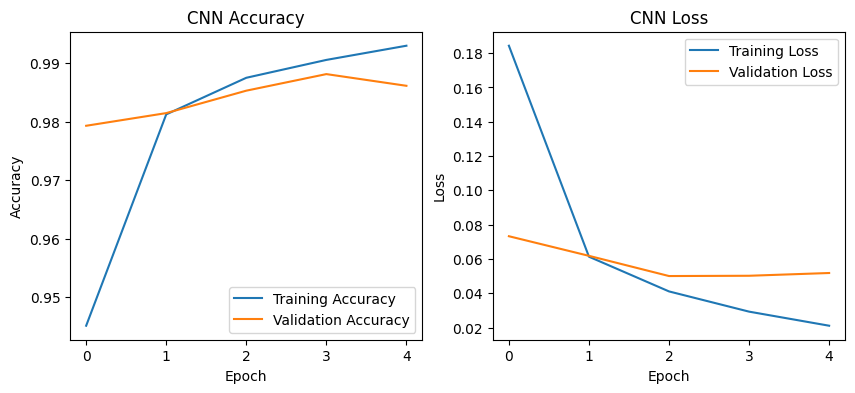

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4: Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.3853 - loss: 1.6856 - val_accuracy: 0.5586 - val_loss: 1.2381
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5948 - loss: 1.1510 - val_accuracy: 0.6372 - val_loss: 1.0538
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6509 - loss: 1.0055 - val_accuracy: 0.6694 - val_loss: 0.9623
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6846 - loss: 0.9048 - val_accuracy: 0.6918 - val_loss: 0.9127
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7097 - loss: 0.8301 - val_accuracy: 0.6840 - val_loss: 0.9323
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7368 - loss: 0.7568 - val_accuracy: 0.7020 - val_loss: 0.8905
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7544 - loss: 0.7044 - val_accuracy: 0.7094 - val_loss: 0.8798
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7715 -

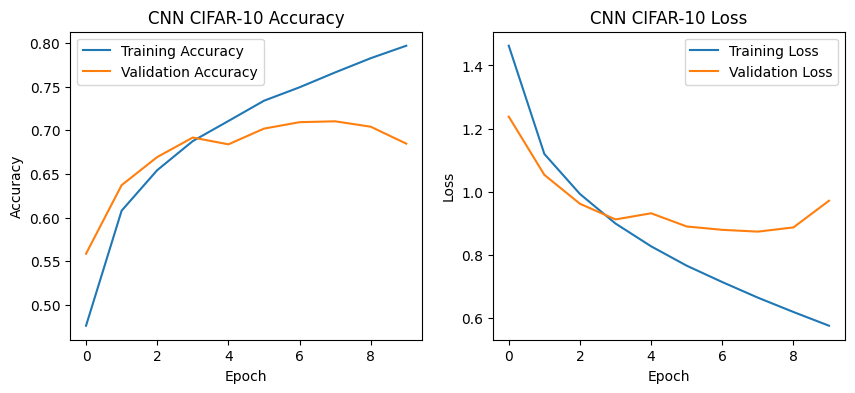

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 552s 391ms/step - accuracy: 0.4551 - loss: 1.5505 - val_accuracy: 0.5650 - val_loss: 1.2383
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 558s 389ms/step - accuracy: 0.5758 - loss: 1.2067 - val_accuracy: 0.5946 - val_loss: 1.1510
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 563s 390ms/step - accuracy: 0.6040 - loss: 1.1440 - val_accuracy: 0.5934 - val_loss: 1.1538
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 562s 390ms/step - accuracy: 0.6168 - loss: 1.0996 - val_accuracy: 0.6040 - val_loss: 1.1341
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 562s 390ms/step - accuracy: 0.6253 - loss: 1.0707 - val_accuracy: 0.6108 - val_loss: 1.1146


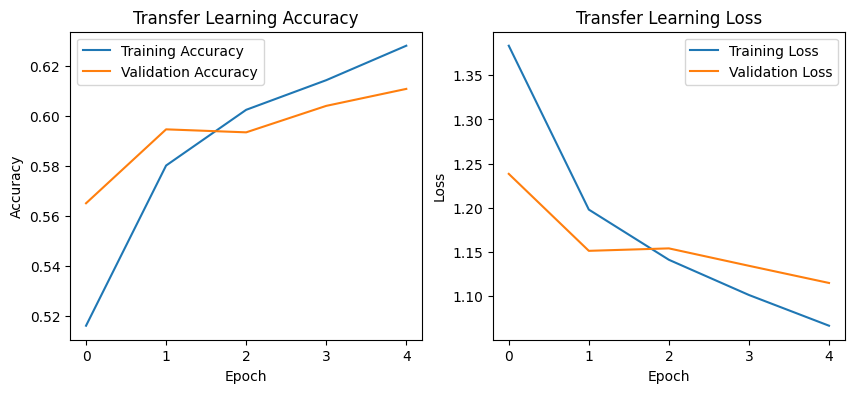

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## D6: Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 350ms/step
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      1000
           1       0.61      0.72      0.66      1000
           2       0.48      0.51      0.50      1000
           3       0.45      0.42      0.43      1000
           4       0.55      0.54      0.54      1000
           5       0.53      0.56      0.54      1000
           6       0.64      0.63      0.64      1000
           7       0.68      0.66      0.67      1000
           8       0.74      0.69      0.71      1000
           9       0.71      0.49      0.58      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



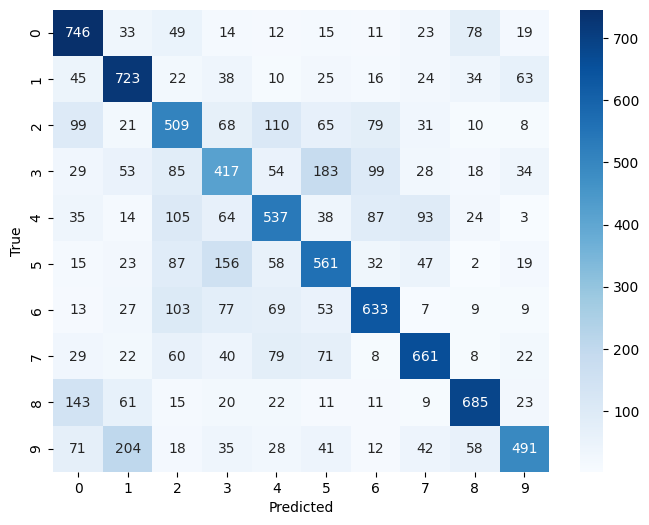

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Tugas Kecil:

### D1

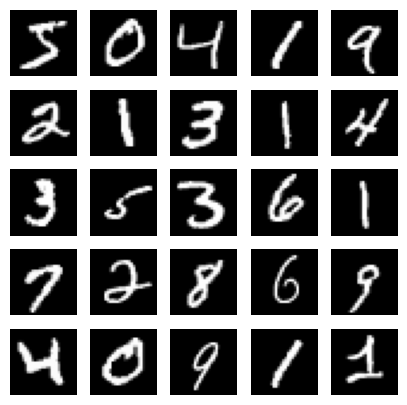

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

### D2

In [ ]:
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_train = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_train_flat)

print("Akurasi:", accuracy_score(y_train, y_pred))

Akurasi: 0.95175


### D3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8922 - loss: 0.3497 - val_accuracy: 0.9828 - val_loss: 0.0554
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9842 - loss: 0.0526 - val_accuracy: 0.9855 - val_loss: 0.0515
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9880 - val_loss: 0.0385
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9910 - loss: 0.0264 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9895 - val_loss: 0.0399


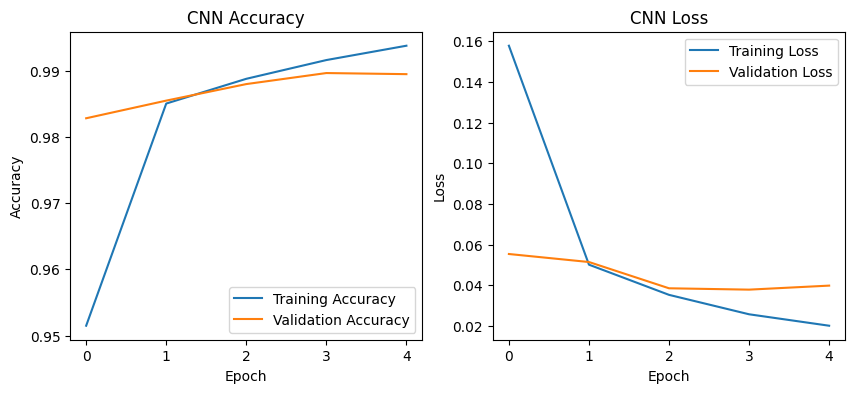

In [ ]:
# BELUM DIKERJAKAN
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### D4